In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

- https://darkpgmr.tistory.com/79

- http://blog.daum.net/shksjy/228

# 2D 이미지 기하학적 변형 (Transformation) → 행렬변환
    1. 강체변환 (Ridid-Body) : 크기와 형태를 유지한 채 위치와 방향을 바꾸는 변환 (ex. 위치변경(Translation), 회전(Rotation))
    2. 유사변환 (Similarity) : 강체변환에 크기의 변환도 허용 (ex. 크기변경(Scaling))
    3. 선형변환 (Linear) : Vector 공간에서의 이동. (회전, 크기변경 및 반전, 밀림도 가능하지만 위치변경은 못한다.)
    4. Affine : 선형변환과 이동변환까지 포함. 선의 수평성은 유지
    5. Perspective : Affine 변환에서 수평성이 유지되지 않음 (원근변환)

----
# 1. Scaling (크기변경)

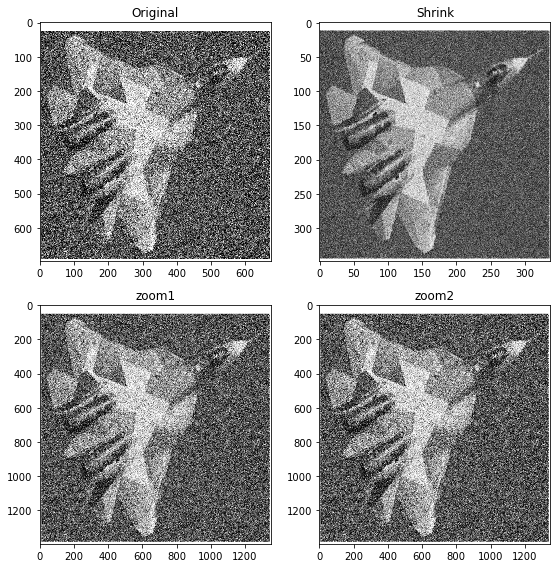

In [2]:
img = cv2.imread('The-original-Gaussian-noisy-image-The-Gaussian-noise-parameters-are-zero-mean-and.png')
height, width = img.shape[:2]

# 이미지 축소
shrink = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Manual Size 지정
zoom1 = cv2. resize(img, (width*2, height*2), interpolation=cv2.INTER_CUBIC)

# 배수 Size 지정
zoom2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

cv2.imshow('Original', img)
cv2.imshow('Shrink', shrink)
cv2.imshow('Zoom1', zoom1)
cv2.imshow('Zoom2', zoom2)
cv2.waitKey(0)
cv2.destroyAllWindows()

titles = ['Original', 'Shrink', 'zoom1', 'zoom2']
images = [img, shrink, zoom1, zoom2]

plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])

plt.tight_layout()
plt.show()

## cv2.resize(src, dsize [, dst [, fx [, fy [, interpolation]]]]) -> dst
    이미지 크기 변환 기능을 제공하는 함수 
    1. src : 입력 이미지 
    2. dsize : 출력 이미지 크기를 픽셀로 지정. 만약 0, None으로 지정하면 fx, fy, 입력이미지의 크기에 따라 다음과 같이 계산한다. 
        ·dsize = Size(round(fx*src.cols), round(fy*src.rows)) 
    3. fx : 가로 방향의 배율 인자를 지정.  만약 0으로 지정하면 dsize와 입력이미지의 크기에 따라 다음과 같이 계산한다.  
    4. fy : 세로 방향의 배율 인자를 지정. 만약 0으로 지정하면 dsize와 입력이미지의 크기에 따라 다음과 같이 계산한다. 
        ·fx = (double) dsize.width / src.cols 
        ·fy = (double) dsize.height / src.rows 
    위 같은 조건 때문에 dsize 혹은 fx와 fy가 모두 0 이어서는 안된다.
    
    ★★ interpolation (보간법, 내간법) : 이미지의 크기를 조정할 때 발생하는 문제는 이미지를 축소할 때 픽셀값이 누락되거나 이미지를 확대할 때 그 사이를 매꿔줄 픽셀값이 아예 존재하지 않는다는 것이다. 이런 문제를 해결하기 위한 방법으로 openCV는 다양한 interpolation 알고리즘을 제공하고 있다.
    1. cv2.INTER_NEAREST
    2. cv2.INTER_LINEAR
    3. cv2.INTER_CUBIC
    4. cv2.INTER_AREA
    5. cv2.INTER_LANCZOS4
    6. cv2.INTER_LINEAR_EXACT
    7. cv2.INTER_MAX
    8. cv2.WARP_FILL_OUTLIERS
    9. cv2.WARP_INVERSE_MAP
    cv::InterpolationFlags 참고
    일반적으로 이미지를 축소할 때는 INTER_AREA 알고리즘을, 이미지를 확대할 때는 INTER_CUBIC(느림, 정확도 높음), INTER_LINEAR(빠름, 정확도 낮음)을 사용하는 것을 추천한다.

----
# 2.Translation (위치변경)
    Translation은 이미지의 모든 픽셀을 x, y 방향으로 일정한 양만큼 이동시키는 과정이며 그 가운데 크기와 형태가 변하지 않으므로 강체변환(Ridid Transformation)이다. 이 이미지를 이동시키기 위해서는 cv2.wrapAffine() 함수를 사용해야 한다.

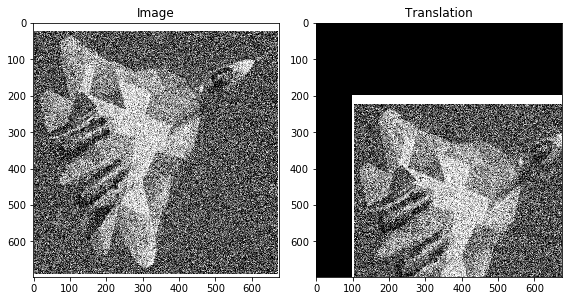

In [3]:
img = cv2.imread('The-original-Gaussian-noisy-image-The-Gaussian-noise-parameters-are-zero-mean-and.png')
rows, cols = img.shape[:2]

# 변환 행렬, X축으로 10, Y축으로 20 이동
M = np.float64([[1, 0, 100], [0, 1, 200]])
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('Original', img)
cv2.imshow('Translation', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Image')

plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.title('Translation')
plt.tight_layout()
plt.show()

    Affine Transformation(아핀 변환) : 2차원 이미지와 변환을 위한 Affine Transform 행렬이 존재한다고 하자. 원본 이미지의 (x, y)의 이동, 회전 및 크기 등의 변화를 거친 후 표현되는 (x^, y^)이 있을 때, 이 둘 사이의 관계를 나타낼 때 Affine Transform 행렬이 사용된다. 이 Affine Transformation 방법으로 회전, 크기변경, 평행이동, 반전 및 밀어내기 등이 가능하다.
    
    [x^] = [ a, b ][ x ] + [ e ]
    [y^]   [ c, d ][ y ]   [ f ]
    
    openCV에서는 아핀 변환을 수행하는 함수가 cv2.warpAffine, cv2.getRotationMatrix2D 로 총 2가지 함수가 있는데, 전자의 경우에는 주어진 인자들을 바탕으로 아핀 변환을 수행하고, 후자의 경우 2 * 3 크기의 회전 행렬을 얻을 수 있다.
    
        
## cv2.warpAffine(src, M, dsize [, dst [, flags [, borderMode [, borderValue]]]]) → dst
    이미지에서 아핀 변환을 적용하는 함수이다. 
    warpAffine 함수에서 아핀 변환을 계산하는 공식은 아래와 같다.
    dst(x, y) = src(M_11x + M_12y + M13, M_21x, M_22y + M_23)
    
    1. src : 입력 이미지
    2. M : 2 * 3 크기의 변환 행렬
    3. dsize : 출력 이미지 크기

    openCV에서 이동을 위한 변환 행렬은 다음과 같이 정의할 수 있다.
        [ 1, 0, X ]
        [ 0, 1, Y ]
    이때, X, Y는 이미지를 이동할 픽셀 단위의 크기이다. 이미지 이동은 좌상단에서 가로방향으로 X만큼, 세로방향으로 Y만큼 움직인다.

----
# 3. Rotation (이미지 회전)
    Rotation은 이미지의 특정 픽셀 (x, y)를 어떤 무게중심을 기준으로 특정 각도에 맞춰서 회전시키는 과정이다. 이미지 회전 역시 이미지의 형태를 변형시키지 않는다는 점에서 강체 변환이며 또한 벡터 공간에서 움직이므로 선형 변환(Linear Transformation)이라고 할 수 있다.

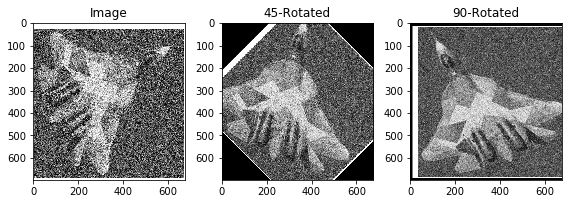

In [4]:
img = cv2.imread('The-original-Gaussian-noisy-image-The-Gaussian-noise-parameters-are-zero-mean-and.png')
height, width = img.shape[:2]

M1 = cv2.getRotationMatrix2D((height/2, width/2), 45, 1)
M2 = cv2.getRotationMatrix2D((height/2, width/2), 90, 1)

img2 = cv2.warpAffine(img, M1, (width, height))
img3 = cv2.warpAffine(img, M2, (width, height))

cv2.imshow("Original", img)
cv2.imshow("45-Rotated", img2)
cv2.imshow("90-Rotated", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Image')

plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.title('45-Rotated')

plt.subplot(1, 3, 3)
plt.imshow(img3)
plt.title('90-Rotated')
plt.tight_layout()
plt.show()

    앞서 언급했듯이 Affine Transformation으로 이미지 이동, 변환, 스케일링 뿐만아니라 이미지 반전, 밀어내기 등도 가능하다고 했다. 따라서 이미지 회전에도 Affine Transformation을 적용하기 위해 cv2.warpAffine 함수가 사용되고 있는 모습을 볼 수 있다. 문제는 이제 아핀 변환에 사용하기 위한 변환 행렬을 만드는 것이다. 앞서 이동변환의 경우 2 * 3의 크기로 X, Y값 조정을 통해 쉽게 얻을 수 있었는데 회전 행렬을 위한 변환 행렬은 그보다 조금 더 복잡하다.
    
    물체를 (x, y)를 반시계 방향으로 θ만큼 회전시키는 변환행렬은 다음과 같다.
        [x^] = [ cosθ, -sinθ ][ x ]
        [y^]   [ sinθ, cosθ  ][ y ]
    여기서 주의해야 할 점은 회전의 기준이 원점이라는 사실이다. 즉, 물체가 제자리에서 도는 것이 아니라 (0, 0)을 기준으로 크게 도는 것이다. 하지만 실제 문제에서는 이미지 원점(좌상단 꼭지점)을 중심으로 한 회전변환은 현실적이지 못하며, 또한 어떤 점 (x, y)에서 회전한 결과 (x^, y^)로 변환될때, 만약 이 두 점과 원점 (0, 0) 사이의 거리가 서로 다르다면 이러한 회전변환 행렬은 존재하지 않게 된다.
    
    이 문제를 해결하는 방법은 일단 스케일(scale) 변화까지 고려하여 변환을 구한 후, 나중에 스케일 변화를 제거하는 것이다. 스케일 변화를 고려한 회전변환은 일반적으로 다음과 같이 표현한다.
        [x^] = [ s * cosθ, - s * sinθ ][ x ]
        [y^]   [ s * sinθ, s * cosθ   ][ y ]
        
    보통의 경우, 현재 물체의 위치에서 제자리 회전이 일어나는 경우가 대부분이다. 이를 위해 나타난 모델이 Ridid 강체 변환 모델이며 여기에 스케일 변화까지 허용한 변환을 Similarity 유사 변환 모델, 또 이를 직선, 거리비, 평행성을 보존하면서 선형변환 까지 포함시킨, 좀 더 일반적인 모델로 바꾼 것이 Affine 변환이다.
    
    openCV에서 회전을 위한 변환행렬은 다음과 같이 정의할 수 있다.
    a = scale * cosθ, b = scale * sinθ 라고 하면,
        [ a, b, (1 - a) * center x - b * center y  ]
        [ -b, a, b * center x + (1 - a) * center y ]
    
    하지만 물론 우리는 이를 우리가 직접 구할 일은 없다. 앞서 말했듯이 openCV에서는 아핀 변환에 관해서 2가지 함수를 제공하고 있으며 그 중 getRotationMatrix2D 함수에서 아핀변환을 위한 변환 행렬을 제공해주고 있기 때문이다.

## cv2.getRotationMatrix2D(center, angle, scale) → retval
    2차원 이미지 회전을 위한 아핀 변환 행렬을 계산하는 함수이다.
    1. center : 이미지 회전을 위한 중심을 지정한다.
    2. angle : 회전 각도를 지정한다. 양수이면 반시계방향으로 회전할 것을 의미한다.
    3. scale : 이미지의 크기 비율을 결정한다. (1이면 원본 이미지의 크기 그대로 회전시킨다.)
    
    위 함수로 구한 회전을 위한 아핀 변환 행렬을 warpAffine 함수에 적용시킨다.

----
# 4. Affine Transformation
    이 장의 맨 처음에 아핀 변환에 대해서 설명할 때, 선형변환과 이동변환까지 포함하며 거리의 비 및 선의 수평성은 유지한다고 설명하였다. 지금까지 바라본 Scaling, Translation, Rotation 모두 선의 수평성을 유지하면서 이미지에 변환을 준 사례이므로 이 변환 역시 아핀 변환이라고 할 수 있다. 그렇다면 이제는 이 아핀 변환을 이용해 이미지를 기울여보자.

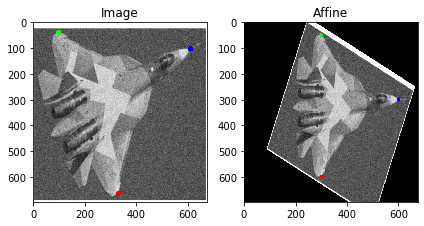

In [5]:
img = cv2.imread('The-original-Gaussian-noisy-image-The-Gaussian-noise-parameters-are-zero-mean-and.png')
img = cv2.GaussianBlur(img, (5, 5), 0)
rows, cols = img.shape[:2]

pts1 = np.float32([[610, 104], [100, 39], [332, 664]])
pts2 = np.float32([[600, 300], [300, 50], [300, 600]])

cv2.circle(img, (610, 104), 10, (255, 0, 0), -1)
cv2.circle(img, (100, 39), 10, (0, 255, 0), -1)
cv2.circle(img, (332, 664), 10, (0, 0, 255), -1)

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('Original', img)
cv2.imshow('Affine', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
b, g, r = cv2.split(dst)
dst = cv2.merge([r, g, b])

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Image')

plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.title('Affine')
plt.tight_layout()
plt.show()

    이미지를 적당히 어느 형태로 기울이거나 반전을 주고 싶다면 우선 적당히 아핀 변환을 위한 행렬을 구하는 과정을 알아야 한다. 아핀 변환의 계산 방법은 위에서 소개한 대로 다음과 같다.
    [x^] = [ a, b ][ x ] + [ e ]
    [y^]   [ c, d ][ y ]   [ f ]
    
    이 6개의 미지수로 이루어진 아핀 변환 행렬을 구하기 위해서는 적어도 변환 전 위치 3쌍과 변환 후 위치 3개가 필요하다. 각각 (x1, y1), (x2, y2), (x3, y3), (x1^, y1^), (x2^, y2^), (x3^, y3^) 라고 하면 미지수 a, b, c, d, e, f는 다음과 같은 방법을 통해 구할 수 있다.
    
    [ x1, y1, 0, 0, 1, 0 ][ a ] = [x1^]
    [ 0, 0, x1, y1, 0, 1 ][ b ]   [y1^]
    [ x2, y2, 0, 0, 1, 0 ][ c ]   [x2^]
    [ 0, 0, x2, y2, 0, 1 ][ d ]   [y2^]
    [ x3, y3, 0, 0, 1, 0 ][ e ]   [x3^]
    [ 0, 0, x3, y3, 0, 1 ][ f ]   [y3^]
    
    변환 전 위치 3쌍을 하나의 numpy array로 묶어 pts1에 초기화 하고 변환 후 위치 3쌍을 마찬가지로 하나의 numpy array로 묶어 pts2에 초기화 한다. openCV에서는 이렇게 만들어진 위치 쌍 pts1과 pts2를 가지고 아핀 변환 행렬을 구하는 함수를 제공한다.
    
## cv2.getAffineTransform(src, dst) → retval
    위 함수는 변환 전 위치 src와 변환 후 위치 dst를 기준으로 2 * 3 크기의 아핀 변환 행렬을 계산하여 반환한다. 이렇게 구한 아핀 변환 행렬을 warpAffine 함수를 이용해 이미지에 적용한다.    

----
# 5. Perspective Transformation, Homograpy, Projective Transformation (원근 변환)
    지금까지 크게 Affine 변환에 대해서 다루었다. 아핀 변환은 이미지의 거리 비, 수평선을 유지한 채 변환시키는 과정이다. 위와 같은 변환 방법은 크기에 변화를 주거나 이미지를 평행이동 시킬 때, 이미지를 회전하고 싶을 때 주로 사용한다. 하지만 위 방법으로는 앞 뒤로 기울어진 이미지에 대해서는 제대로 작동하지 않는다. 앞 뒤로 기울어진 이미지에 대해서는 두 점 사이의 거리 비를 조정해야 하지만 아핀 변환에서는 그렇게 할 수 없기 때문이다. 이를 위해 나온 것이 바로 Perspective Transformation 방법이다.

Text(0.5, 1.0, 'Perspective')

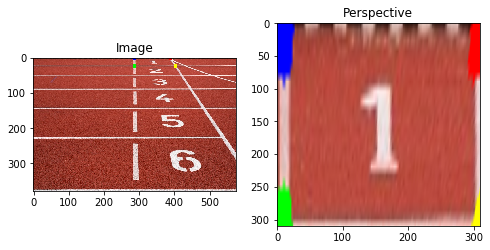

In [16]:
img = cv2.imread('athletic-field-1867053_1920.jpg')
h, w = img.shape[:2]

pts1 = np.float32([[287, 4], [287, 25], [389, 4], [404, 25]])
pts2 = np.float32([[10, 10], [10, 310], [310, 10], [310, 310]])

cv2.circle(img, (287, 4), 5, (255, 0, 0), -1)
cv2.circle(img, (287, 25), 5, (0, 255, 0), -1)
cv2.circle(img, (389, 4), 5, (0, 0, 255), -1)
cv2.circle(img, (404, 25), 5, (0, 255, 255), -1)

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (310, 310))

cv2.imshow('Original', img)
cv2.imshow('Perspective', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
b, g, r = cv2.split(dst)
dst = cv2.merge([r, g, b])

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Image')

plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.title('Perspective')

    Affine Transformation 에서는 2 * 3 크기의 변환 행렬을 가졌던 것에 비해서 Perspective Transformation 에서는 3 * 3 크기의 변환 행렬이 필요하다. 3 * 3 크기의 변환 행렬을 구하기 위해선 4쌍의 변환 전 위치와 변환 후 위치가 필요하다. 적어도 4쌍이어야 하는 이유는 homogeneous 좌표에서의 homograpy의 scale를 결정할 수 없기 때문이다. 즉 결정할 필요가 없다. 쉽게 생각해서 2D 평면에서 임의의 사각형을 임의의 사각형으로 매핑시킬 수 있는 변환이라고 이해하자. 주어진 매칭쌍들로부터 변환 행렬을 구하는 과정에 대해서는 Elan Dubrfsky, "Homography Estimation", 2009 에 잘 정리되어 있다.
    
    변환 행렬을 통해 이미지를 변환하는 과정은 앞서 Affine Transformation 과정과 동일하다. 우선 이미지를 불러들어온 후, 변환 하기 전 위치를 numpy array로 만들어 pts1에 초기화 한다. 이 때 위치는 좌상 → 좌하 → 우상 → 우하 순으로 찍어준다. 마찬가지로 변환 한 후의 위치 역시 numpy array로 만들어 pts2에 초기화 한다. 초기화 된 pts1과 pts2를 바탕으로 getPerspectiveTransform 함수를 통해 3 * 3 크기의 변환 행렬을 만들어 준다.
    
## cv2.getPerspectiveTransform(src, dst [, solveMethod]) → retval
    위 함수는 변환 전 위치 src와 변환 후 위치 dst를 기준으로 3 * 3 크기의 Perspective 변환 행렬을 계산하여 반환한다. 
    
## cv2.warpPerspective(src, M, dsize [, dst [, flags [, borderMode [, borderValue]]]]) → dst
    이미지에서 원근 변환을 적용하는 함수이다. 
    1. src : 입력 이미지
    2. M : 3 * 3 크기의 변환 행렬
    3. dsize : 출력 이미지 크기

----

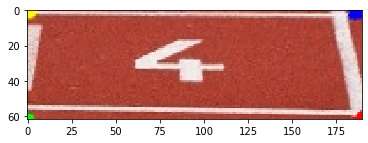

In [47]:
img = cv2.imread('athletic-field-1867053_1920.jpg')
count = 0
blue, green, red, yellow = (255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255)
point_array = []

def calPoint(ary):
    total = np.sum(ary, axis=1)
    differ = np.diff(ary, axis=1)

    left_top = ary[np.argmin(total)]
    left_bottom = ary[np.argmax(differ)]
    right_top = ary[np.argmin(differ)]
    right_bottom = ary[np.argmax(total)]
    src = [left_top, left_bottom, right_top, right_bottom]
    src = np.float32(src)
    
    width1 = abs(left_top[0] - right_top[0])
    width2 = abs(left_bottom[0] - right_bottom[0])
    width = max(width1, width2)
    height1 = abs(left_top[1] - left_bottom[1])
    height2 = abs(right_top[1] - right_bottom[1])
    height = max(height1, height2)
    dst = np.float32([[0, 0], [0, height -1], [width -1, 0], [width -1, height -1]])
    return (src, dst, width, height)


def homograpyTransformation(event, x, y, flags, param):
    global count, point_array
    
    if event == cv2.EVENT_LBUTTONDOWN:
        count = count + 1
        point_array.append([x, y])
        
    elif event == cv2.EVENT_LBUTTONUP:
        if count == 1:
            cv2.circle(img, (x, y), 5, blue, -1)
            cv2.imshow('Original', img)

        elif count == 2:
            cv2.circle(img, (x, y), 5, green, -1)
            cv2.imshow('Original', img)

        elif count == 3:
            cv2.circle(img, (x, y), 5, red, -1)
            cv2.imshow('Original', img)

        elif count == 4:
            count = 0
            cv2.circle(img, (x, y), 5, yellow, -1)
            cv2.imshow('Original', img)

            src, dst, width, height = calPoint(point_array)
            M = cv2.getPerspectiveTransform(src, dst)
            transformImage = cv2.warpPerspective(img, M, (width, height))
            cv2.imshow('Transform', transformImage)
            cv2.imwrite('Perspective_Transformation.jpg', transformImage)

cv2.namedWindow('Original')
cv2.setMouseCallback('Original', homograpyTransformation, param = img)

while True:
    cv2.imshow('Original', img)
    if cv2.waitKey(0) & 0xFF:
        transformImage = cv2.imread('Perspective_Transformation.jpg')

        b, g, r = cv2.split(transformImage)
        transformImage = cv2.merge([r, g, b])
        plt.imshow(transformImage)
        break

cv2.destroyAllWindows()